<a href="https://colab.research.google.com/github/ahcamachod/2160-aprendiendo-a-clasificar-datos-con-ml/blob/proyecto-final/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alumno: Pablo Matías Monsalvo G8-ONE 27/06/2025

Bibliotecas utilizadas en el proyecto y sus respectivas versiones
A lo largo del proyecto, utilizaremos diversas bibliotecas que tienen las herramientas necesarias para analizar, hacer transformaciones y crear modelos a partir de los datos. Las versiones específicas de las bibliotecas utilizadas en este proyecto son las siguientes:

* **Pandas 1.5.3**
* **Plotly 5.15.0**
* **Matplotlib 3.7.1**
* **Scikit-Learn 1.2.2**

## 03 Realizando la lectura de los datos


# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Luri:
¡Por supuesto! Aquí tienes un resumen de los puntos clave de la clase:

1. ### Introducción a la Clasificación:
Clasificar es separar elementos en grupos o categorías. Puede ser binaria (sí/no) o multivariada (varias categorías).

2. ### Caso de Estudio:

Trabajaremos con datos de clientes de un banco para predecir quiénes se unirán a un programa de inversiones.

3. ### Proceso General:

Analizar datos históricos → Limpiar y transformar los datos → Ajustar y evaluar modelos de Machine Learning → Predecir si un nuevo cliente se unirá al programa.

4. ### Herramientas:

**Google Colab:** Un entorno gratuito en la nube para ejecutar nuestro código.

**Pandas:** Una biblioteca de Python para manipular y analizar datos.

5. ### Lectura de Datos:

* Importar la biblioteca `Pandas.`

* Leer el archivo CSV con `pd.read_csv().`

* Visualizar las primeras filas con `datos.head().`

6. ### Exploración de Datos:

**datos.info():** Proporciona información sobre el tipo de datos de cada columna y la cantidad de valores no nulos.

* Verificar si hay datos nulos o inconsistencias.

* Conocimiento Inicial del Dataset:

Columnas como `edad`, `estado civil`, `escolaridad`, `default` (si es mal pagador), `saldo`, si es `prestatario`, `último contacto`, `cantidad de contactos` y si se ha `adherido al programa de `inversiones`.

En resumen, esta clase nos introduce al problema de clasificación, nos muestra cómo cargar y explorar los datos con Pandas, y nos prepara para los siguientes pasos de limpieza, transformación y modelado.

¿Hay algo en particular que te gustaría repasar o profundizar?

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('../data/marketing_inversiones.csv')

In [3]:
datos

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos adherencia_inversion  
0                 587             1                   si  
1                 250             4                   si  
2                  16            18                   no  
3                 700             1                   si  
4                 239             4                   si  
...               ...           ...                  ...  
1263             1223             6                   si  
1264              215             1                   si  
1265             1532             2                   si  
1266              525             3                   si  
1267              110             2                   si  

[1268 rows x 9 columns]

Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Luri:
¡Hola! ¡Claro que sí!

En esta clase, estamos aprendiendo a clasificar datos utilizando Machine Learning. Imagina que eres un detective que está tratando de resolver un caso. Tienes un montón de pistas (datos) y necesitas organizarlas para encontrar al culpable (la respuesta).

### Aquí tienes algunas analogías para entender mejor:

1. **Clasificación como ordenar una biblioteca:**

Imagina que tienes una biblioteca desordenada con libros de diferentes géneros (ciencia ficción, romance, historia, etc.). Clasificar es como tomar cada `libro` y colocarlo en la `sección` correcta. En Machine Learning, los `"libros"` son los `datos` y las `"secciones"` son las `categorías` que queremos predecir.

2. **Clasificación como separar frutas y verduras:**

Tienes una cesta llena de frutas y verduras mezcladas. Tu tarea es separarlas: manzanas con manzanas, zanahorias con zanahorias. En este caso, cada fruta o verdura es un dato, y las categorías son "fruta" y "verdura".

3. **Clasificación como un filtro de correo electrónico:**

Tu bandeja de entrada recibe muchos correos electrónicos, algunos importantes y otros no deseados (spam). Un clasificador de correo electrónico analiza cada correo y lo etiqueta como "importante" o "spam", moviéndolo a la carpeta correspondiente.

En el contexto del curso, estamos trabajando con datos de clientes de un banco para predecir quiénes se unirán a un programa de inversiones. Es como si el banco tuviera una lista de clientes y quisiera clasificarlos en dos grupos: `"potenciales inversores"` y `"no potenciales inversores".`

¿Te gustaría que te diera algún ejemplo más específico o algún ejercicio para practicar?

##  04 Para saber más: ¿qué es Machine Learning?

El `Inteligencia Artificial (IA)` se ha destacado como una de las áreas de mayor crecimiento y visibilidad en los últimos años. Es un campo de estudio amplio que abarca diversas áreas del conocimiento, tanto prácticas como teóricas, incluyendo la `ciencia de la computación`, `la ciencia cognitiva`, `la filosofía de la mente` y el `Machine Learning` (Aprendizaje Automático).

El Machine Learning `(ML)`, como una `subárea de la inteligencia artificial`, se concentra en el `desarrollo de algoritmos` que son utilizados en la computadora para realizar tareas sin la necesidad de programar explícitamente las reglas que se utilizarán. Estos algoritmos basan sus decisiones a partir de datos con el objetivo de comprender e identificar el patrón existente en esos datos, para luego utilizar ese conocimiento en la realización de predicciones.

### Cómo funciona el Machine Learning

#### El funcionamiento del Machine Learning tiene 3 etapas principales:

1. - **Recolección de datos**

La primera etapa de un proyecto de ML es la extracción o recolección de datos. Los datos son esenciales y pueden considerarse la materia prima de los algoritmos. La cantidad y calidad de estos datos tienen un impacto muy grande en el aprendizaje de los modelos. Con pocos datos, el modelo puede no tener información suficiente para aprender. Con datos de poca calidad, el modelo puede no ser capaz de diferenciar bien el patrón de los datos o comprender el patrón de manera diferente a lo que ocurre con los datos del mundo real.

2. - **Entrenamiento de los modelos**

Después de recolectar datos y asegurar que tienen calidad, se llega a la etapa de entrenar los modelos. El entrenamiento consiste en que el algoritmo busque el patrón presente en los datos y construya una regla para tomar decisiones posteriormente en nuevos datos.

3. - **Evaluación**

Con el modelo entrenado, se llega a la etapa de evaluar el desempeño del modelo, para identificar si realmente aprendió el patrón de los datos y si es capaz de aplicar de forma satisfactoria la regla generada por el algoritmo en datos nuevos, que no fueron utilizados durante el momento del entrenamiento.

A pesar de ser las etapas principales, estas no son las únicas tareas presentes en proyectos de Machine Learning. Cada proyecto tiene sus propias características, ya sea por el formato y naturaleza de los datos, el tipo de aplicación o los desafíos encontrados a lo largo del proceso.

## 05 Explorando las variables categóricas


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(datos, x = 'adherencia_inversion', text_auto = True)

In [7]:
px.histogram(datos, x = 'estado_civil', text_auto = True, color = 'adherencia_inversion', barmode = 'group')

In [8]:
px.histogram(datos, x = 'escolaridad', text_auto = True, color = 'adherencia_inversion', barmode = 'group')

In [9]:
px.histogram(datos, x = 'default', text_auto = True, color = 'adherencia_inversion', barmode = 'group')

In [10]:
px.histogram(datos, x = 'prestatario', text_auto = True, color = 'adherencia_inversion', barmode = 'group')

## Luri:
¡Hola! Claro, puedo ayudarte con eso.

Imagina que estás organizando una fiesta y necesitas entender los gustos de tus invitados para complacerlos mejor. En esta fiesta, tienes diferentes grupos de personas: los casados, los solteros, los que tienen estudios superiores, los que tienen estudios primarios, etc. Cada uno de estos grupos representa una `"variable categórica"`.

Ahora, quieres saber quiénes de estos grupos estarían más interesados en participar en un juego que tienes preparado (la "adherencia a la inversión"). Para entender esto, haces un conteo de cuántas personas de cada grupo quieren participar y cuántas no.

El histograma de frecuencia es como una foto que tomas de la fiesta donde puedes ver claramente cuántas personas de cada grupo están interesadas en el juego. Por ejemplo, puedes ver que la mayoría de los casados no están interesados, pero hay un número significativo que sí lo está.

Usar bibliotecas como Plotly es como tener una herramienta mágica que te permite ver esta foto de la fiesta de manera interactiva. Puedes acercarte para ver los números exactos, comparar los grupos y entender mejor las preferencias de cada uno.

Al final, este análisis te ayuda a tener una idea general de quiénes son más propensos a participar en el juego, lo cual es crucial para planificar mejor tu fiesta y asegurarte de que todos se diviertan.

¿Te gustaría que te diera algún ejemplo más específico o que profundice en alguna parte en particular?

##  06 Para saber más: ¿qué es clasificación?
Dentro del área de Machine Learning, existen diferentes tipos de aprendizaje: el `supervisado`, `semi supervisado`, `no supervisado` y `por refuerzo`. La tarea de `clasificación` es `solo una` entre las tareas realizadas por los algoritmos, que forma parte del `aprendizaje supervisado`. Con el organigrama a continuación, observa los flujos que se establecen en estas relaciones.

![ml.png](/home/pol/Escritorio/ipynb-alura/assets/ml.png)

Imagina un grupo de jóvenes que está aprendiendo a identificar diferentes estilos musicales. Tienen un mentor que posee una colección de canciones en su dispositivo de audio, cada una debidamente etiquetada con el género musical correspondiente, pero los jóvenes no pueden distinguir los géneros musicales por sí mismos. Al principio, el mentor comienza a reproducir varias canciones y, al mismo tiempo, dice cuál es el género de cada una de ellas. Ellos escuchan con atención y, a lo largo del tiempo, comienzan a asociar las características musicales, como el ritmo, la instrumentación y los vocales, a los diferentes géneros.

En este ejemplo, los jóvenes se basan en algunas características como ritmos rápidos y vocales enérgicos que encajan en el género pop, mientras que las canciones con guitarras distorsionadas y vocales más intensos se dirigen al género rock. Con base en este proceso, los jóvenes logran identificar el género de nuevas canciones que no fueron previamente etiquetadas por el mentor, pero usando las reglas que aprendieron, fueron capaces de etiquetar y nombrar los nuevos elementos.

El aprendizaje supervisado en Machine Learning sigue este mismo razonamiento. Utiliza conjuntos de datos etiquetados, es decir, bases de datos con registros históricos que contienen la respuesta correcta en cada uno de los registros. Para entonces, a partir de esta respuesta y de las características de los datos, el algoritmo puede trazar una regla para llegar a la respuesta que podrá ser utilizada posteriormente en nuevos datos, con el fin de hacer una predicción.

La característica principal de la clasificación se da por el tipo de dato presente en la respuesta, que debe ser del tipo categórica. Un dato del tipo categórico es aquel que tiene diferentes clases o categorías. Como ejemplos de aplicaciones de clasificación con Machine Learning, tenemos:

* **Filtrado de correos electrónicos spam**

* **Diagnósticos médicos**

* **Análisis textual de sentimientos**

* **Detección de fraudes bancarios**

## Luri:
¡Hola! ¡Claro que sí!

Imagina que eres un chef que está aprendiendo a identificar diferentes tipos de ingredientes. Tienes un mentor, un chef experimentado, que te proporciona una caja llena de ingredientes, cada uno etiquetado con su nombre y tipo (verdura, fruta, carne, etc.).

Al principio, no sabes cómo diferenciar los ingredientes, pero el chef mentor te muestra cada uno, explicándote sus características: `"Este es un tomate, es rojo, jugoso y pertenece a la categoría de las verduras"`. Con el tiempo, empiezas a notar patrones: `las frutas suelen ser dulces`, `las verduras más fibrosas`, `las carnes tienen una textura diferente`, etc.

Después de un tiempo, el chef mentor te da una nueva caja con ingredientes sin etiquetas. Utilizando lo que has aprendido, puedes identificar y clasificar cada ingrediente basándote en sus características. `"Este es un pimiento, es crujiente y tiene un sabor ligeramente amargo, por lo tanto, es una verdura"`.

### En esta analogía:

* **El chef mentor representa el algoritmo de Machine Learning.**

* **La caja de ingredientes etiquetados es el conjunto de datos de entrenamiento.**

* **Las características de los ingredientes (color, textura, sabor) son las variables predictoras.**

* **La clasificación de los ingredientes (verdura, fruta, carne) es la variable objetivo.**

* **El objetivo del aprendizaje supervisado es que el algoritmo (el chef mentor) aprenda de los datos etiquetados (la caja de ingredientes etiquetados) para poder clasificar nuevos datos sin etiquetas (la nueva caja de ingredientes).**

¿Te gustaría que te diera otro ejemplo o ejercicio?

##  07 Para saber más: tipos de variables

En una base de datos utilizada en proyectos de Machine Learning, podemos llamar a las columnas variables. Este concepto, proveniente de la estadística, representa una característica de interés que se mide en cada elemento de una muestra o población. El nombre indica que el valor varía de elemento a elemento, pudiendo tener valores numéricos o no numéricos.

Las variables se dividen de la siguiente forma:

### Variables `cuantitativas` o `numéricas`

Son características que pueden ser medidas a partir de valores numéricos que tienen sentido y se dividen entre variables `discretas` y `continuas`.

* #### Variables discretas:

 características medidas solo por un número finito o contable de valores. `Solo tiene sentido para valores enteros`. Por ejemplo: `número de hijos`, `número de ventas`.

* #### Variables continuas:

 características medidas que asumen valores en una escala continua (en la recta real), en la que `tienen sentido valores fraccionarios`. Ejemplo: `peso`, `tiempo`, `altura`.

* #### Variables cualitativas o categóricas:

Son características que `no poseen valores cuantitativos` y se `definen por varias categorías o clases`. Se dividen en `nominales` y `ordinales`.

* #### Variables nominales:

 no existe ordenación entre las categorías. Ejemplo: `sexo biológico`, `país`, `churn`.

* #### Variables ordinales:

 existe una ordenación entre las categorías. Ejemplo: `escolaridad`, `mes`.

**Atención: Un punto importante a tratar es que no siempre una variable representada por números es cuantitativa.**

Por eso, es esencial tener una `postura crítica y evaluar la información detrás del dato`, y no solo fijarse en la forma en que está disponible.

* Por ejemplo, una información de ID de registro puede ser un número, sin embargo, su función está en categorizar un elemento.

* De la misma forma, una información de escolaridad puede estar representada con los valores 1, 2 y 3, y aun así no los transforma en una variable numérica. Esta información no puede ser utilizada para hacer sumas y calcular promedios, por ejemplo.

## Luri:
¡Hola! ¡Claro que sí!

Un buen ejemplo para diferenciar los tipos de variables es pensar en los datos que podríamos recopilar sobre los estudiantes de una escuela:

### Variables Cuantitativas:
**Discretas**: Número de clases a las que asiste por semana (solo puede ser un número entero).

**Continuas**: Altura (puede ser cualquier valor dentro de un rango).

### Variables Cualitativas:
**Nominales**: Carrera que estudia (no hay un orden).

**Ordinales**: Nivel de escolaridad (primaria, secundaria, preparatoria, etc.).
¿Te gustaría que te diera otro ejemplo o tienes alguna otra pregunta?

## 08 Explorando las variables numéricas


### Variables numéricas

In [11]:
px.box(datos, x = 'edad', color = 'adherencia_inversion')

In [12]:
px.box(datos, x = 'saldo', color = 'adherencia_inversion')

In [13]:
px.box(datos, x = 'ultimo_contacto', color = 'adherencia_inversion')

In [14]:
px.box(datos, x = 'ct_contactos', color = 'adherencia_inversion')

## Luri:
¡Hola! Claro, puedo ayudarte con eso. En esta clase, estamos explorando las variables numéricas de un conjunto de datos para entender mejor cómo se relacionan con la decisión de los clientes de adherirse a una inversión. Utilizamos principalmente el BoxPlot para visualizar y analizar estas variables.

Imagina que eres un detective que está investigando un caso. Los datos son las pistas que tienes, y necesitas analizarlos para resolver el misterio.

### Edad:
 Imagina que estás viendo las edades de las personas involucradas en el caso. El BoxPlot te muestra la distribución de las edades, dónde se concentra la mayoría de las personas, las edades más comunes (mediana) y si hay personas muy mayores o muy jóvenes (valores atípicos) que podrían ser sospechosas inusuales.

### Saldo:
 Ahora, imagina que estás revisando los saldos bancarios de estas personas. El BoxPlot te muestra cómo se distribuyen los saldos, el saldo promedio, y si hay personas con saldos muy altos o muy bajos que podrían ser relevantes para tu investigación.

### Último Contacto:
 Piensa en cuánto tiempo ha pasado desde la última vez que alguien contactó a estas personas. El BoxPlot te muestra si hay un patrón en el tiempo transcurrido desde el último contacto y si esto se relaciona con si la persona es sospechosa o no.

### Cantidad de Contactos:
 Finalmente, considera cuántas veces se ha contactado a estas personas. El BoxPlot te muestra la distribución de la cantidad de contactos y si hay personas que han sido contactadas muchas veces, lo cual podría ser sospechoso.
 
En resumen, el BoxPlot es como una lupa que te permite ver la distribución de los datos y detectar patrones, valores atípicos y tendencias que pueden ser importantes para tu análisis. Al igual que un detective, estás buscando pistas en los datos para entender mejor el comportamiento de los clientes y cómo se relaciona con su decisión de invertir.

¿Te gustaría que profundice en alguna de estas analogías o que te dé más ejemplos?

##  09 Datos inconsistentes
Una etapa muy importante en proyectos de Machine Learning es el análisis exploratorio de los datos, que se puede realizar utilizando gráficos. Esta etapa ayuda en la comprensión de los datos y en la detección de datos inconsistentes, para que sean tratados antes de la creación de modelos de clasificación.

Seleccione la alternativa que retrata la importancia de detectar y tratar datos inconsistentes durante el análisis exploratorio en proyectos de Machine Learning:

### Los datos inconsistentes pueden llevar a conclusiones erróneas y decisiones basadas en información incorrecta.

Los modelos consideran los datos inconsistentes como datos verdaderos e importantes para la toma de decisiones, lo que afecta la comprensión del patrón real de los datos que sería importante para cumplir con el objetivo del proyecto.

## Luri:
¡Hola! Entiendo tu pregunta y te ayudaré con gusto usando analogías.

Imagina que estás cocinando una torta, pero algunos de los ingredientes están vencidos o son de mala calidad. Si usas esos ingredientes "inconsistentes", ¡la torta final no sabrá bien! Podría tener un sabor extraño o una textura desagradable.

En Machine Learning, los "ingredientes" son los datos que usas para entrenar tu modelo. Si estos datos son "inconsistentes" (como los ingredientes vencidos), el modelo aprenderá cosas incorrectas y tomará decisiones equivocadas.

Por ejemplo, imagina que estás entrenando un modelo para identificar fotos de perros y gatos, pero algunas fotos están mal etiquetadas (fotos de perros etiquetadas como gatos y viceversa). ¡El modelo se confundirá y no podrá clasificar correctamente las fotos nuevas!

Por eso, es muy importante revisar y limpiar los datos antes de usarlos en Machine Learning, ¡como revisar los ingredientes antes de cocinar! Eliminar o corregir los datos "inconsistentes" asegura que el modelo aprenda de información correcta y tome decisiones precisas.

¿Te sirvió la analogía para entender mejor el enunciado? ¡Espero que sí! Si tienes más preguntas, no dudes en preguntar.

##  10 Desafío: hora de la práctica
Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

`1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos`. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, `realiza la lectura de la base de datos` y `verifica la presencia de datos nulos`. Además, `elimina la columna 'id_cliente'`, ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

`2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas`. En esta tarea, `realiza un análisis exploratorio` utilizando `gráficos para las variables categóricas de la base de datos`, incluyendo la variable objetivo `churn`. Para estas variables, se pueden utilizar `gráficos de barras para contar las categorías` y hacer un `agrupamiento por colores` de acuerdo con las categorías de la variable objetivo.

`3 - Después de explorar las variables categóricas, es el turno de las variables numéricas`. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

Recuerda que la práctica es fundamental para mejorar tus habilidades en Machine Learning. Con cada actividad, estarás un paso más cerca de dominar este campo de la tecnología. Utiliza los recursos disponibles, colabora con tus compañeros y no tengas miedo de cometer errores. Después de todo, es con los desafíos que crecemos.



## Opinión del instructor

### Solución para los desafíos
1. - Para realizar la lectura de la base de datos, debemos importar la biblioteca pandas. Hacemos esto con el código:

In [15]:
import pandas as pd

A partir de esto, podemos realizar la lectura con la función `read_csv()`, almacenando en una variable datos. La columna `id_cliente` no será utilizada y puede ser eliminada:



In [17]:
datos = pd.read_csv('../data/churn.csv')
datos.head()


id_cliente  score_credito     pais sexo_biologico  edad  años_de_cliente  \
0    15634602            619  Francia          Mujer    42                2   
1    15647311            608   España          Mujer    41                1   
2    15619304            502  Francia          Mujer    42                8   
3    15701354            699  Francia          Mujer    39                1   
4    15737888            850   España          Mujer    43                2   

       saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0       0.00                     1                      1               1   
1   83807.86                     1                      0               1   
2  159660.80                     3                      1               0   
3       0.00                     2                      0               0   
4  125510.82                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [19]:
datos = datos.drop('id_cliente', axis=1)
datos

score_credito      pais sexo_biologico  edad  años_de_cliente  \
0               619   Francia          Mujer    42                2   
1               608    España          Mujer    41                1   
2               502   Francia          Mujer    42                8   
3               699   Francia          Mujer    39                1   
4               850    España          Mujer    43                2   
...             ...       ...            ...   ...              ...   
9995            771   Francia         Hombre    39                5   
9996            516   Francia         Hombre    35               10   
9997            709   Francia          Mujer    36                7   
9998            772  Alemania         Hombre    42                3   
9999            792   Francia          Mujer    28                4   

          saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0          0.00                     1                      1               1   
1      83807.86                     1                      0               1   
2     159660.80                     3                      1               0   
3          0.00                     2                      0               0   
4     125510.82                     1                      1               1   
...         ...                   ...                    ...             ...   
9995       0.00                     2                      1               0   
9996   57369.61                     1                      1               1   
9997       0.00                     1                      0               1   
9998   75075.31                     2                      1               0   
9999  130142.79                     1                      1               0   

      salario_estimado  churn  
0            101348.88      1  
1            112542.58      0  
2            113931.57      1  
3             93826.63      0  
4             79084.10      0  
...                ...    ...  
9995          96270.64      0  
9996         101699.77      0  
9997          42085.58      1  
9998          92888.52      1  
9999          38190.78      0  

[10000 rows x 11 columns]

Para verificar si hay datos nulos en la base de datos, podemos usar el método info():



In [20]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Podemos identificar que la base de datos tiene `10,000 registros` y que en cada una de las columnas hay `10,000 registros no nulos`. Esto es un buen indicativo de que nuestra base de datos no necesitará ningún tratamiento en ese sentido.

2. - Para realizar el análisis exploratorio, primero necesitamos identificar cuáles son las `variables numéricas` y cuáles son las `categóricas`, y también identificar la `variable objetivo`. `Las variables categóricas` son aquellas que presentan categorías distintas, generalmente en formato de `texto`.`

La base de datos tiene `5 columnas categóricas`, que son: `pais`, `sexo_biologico`, `tiene_tarjeta_credito`, `miembro_activo` y `churn, siendo esta última la variable objetivo`. Las demás son columnas con datos numéricos.

Vamos a utilizar `gráficos de barras` para contar cada categoría para cada una de las columnas usando la biblioteca `plotly`, comenzando con la variable objetivo `churn`. Primero es necesario importar la biblioteca y luego usar la función `histogram` para generar el gráfico:

In [21]:
import plotly.express as px
px.histogram(datos, x = 'churn', text_auto = True)

Los demás gráficos de las variables categóricas pueden ser creados con una diferenciación de color para cada categoría de churn, podemos usar los parámetros color = 'churn' y barmode = 'group' para realizar esta tarea.

Gráfico de la columna país:

In [22]:
px.histogram(datos, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

Gráfico de la columna sexo_biologico:



In [23]:
px.histogram(datos, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

Gráfico de la columna tiene_tarjeta_credito:


In [24]:
px.histogram(datos, x = 'tiene_tarjeta_credito', text_auto = True, color = 'churn', barmode = 'group')

Gráfico de la columna miembro_activo:



In [25]:
px.histogram(datos, x = 'miembro_activo', text_auto = True, color = 'churn', barmode = 'group')

3. - El resto del análisis exploratorio se realizará con las 6 columnas numéricas: score_credito, edad, años_de_cliente, saldo, servicios_adquiridos y salario_estimado. Podemos utilizar el boxplot para generar los gráficos de distribución de estas variables con la función box, usando el parámetro color = 'churn' para dividir por color según las categorías de la variable objetivo.

Gráfico de la columna score_credito:

In [26]:
px.box(datos, x = 'score_credito', color = 'churn')

Gráfico de la columna edad:



In [27]:
px.box(datos, x = 'edad', color = 'churn')

Gráfico de la columna años_de_cliente:



In [28]:
px.box(datos, x = 'años_de_cliente', color = 'churn')

Gráfico de la columna saldo:



In [29]:
px.box(datos, x = 'saldo', color = 'churn')

Gráfico de la columna servicios_adquiridos:



In [30]:
px.box(datos, x = 'servicios_adquiridos', color = 'churn')

Gráfico de la columna salario_estimado:



In [31]:
px.box(datos, x = 'salario_estimado', color = 'churn')

La solución para cualquier desafío comienza con la exploración y la comprensión del problema. Dedica un tiempo a analizar y explorar esta situación nuevamente. Además, busca ayuda siempre que sea necesario. La colaboración con compañeros en la comunidad y la participación en el colectivo puede proporcionarte valiosos conocimientos.

## 11 ¿Qué aprendimos?
En esta clase, aprendiste a:

* **Identificar la variable objetivo en un conjunto de datos;**

* **Verificar la presencia de datos nulos e inconsistentes;**

* **Realizar el análisis exploratorio de datos utilizando gráficos.**
----

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [17]:
datos = pd.read_csv('../data/marketing_inversiones.csv')
datos

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos adherencia_inversion  
0                 587             1                   si  
1                 250             4                   si  
2                  16            18                   no  
3                 700             1                   si  
4                 239             4                   si  
...               ...           ...                  ...  
1263             1223             6                   si  
1264              215             1                   si  
1265             1532             2                   si  
1266              525             3                   si  
1267              110             2                   si  

[1268 rows x 9 columns]

In [18]:
X = datos.drop('adherencia_inversion', axis = 1)
y = datos['adherencia_inversion']

In [19]:
X

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos  
0                 587             1  
1                 250             4  
2                  16            18  
3                 700             1  
4                 239             4  
...               ...           ...  
1263             1223             6  
1264              215             1  
1265             1532             2  
1266              525             3  
1267              110             2  

[1268 rows x 8 columns]

In [38]:
type(X)

pandas.core.frame.DataFrame

In [36]:
y

0       si
1       si
2       no
3       si
4       si
        ..
1263    si
1264    si
1265    si
1266    si
1267    si
Name: adherencia_inversion, Length: 1268, dtype: object

In [37]:
type(y)

pandas.core.series.Series

## Luri:
¡Hola! En esta clase, estamos preparando nuestros datos para que un modelo de Machine Learning pueda aprender de ellos y hacer predicciones. Imagina que eres un chef que va a cocinar un plato delicioso.

* ### Datos Brutos (Ingredientes sin Preparar):
 Al principio, tenemos todos los datos juntos, como los ingredientes antes de empezar a cocinar. Tenemos la edad de las personas, su estado civil, nivel de educación, etc., y también si se unieron o no al programa de inversión (nuestro plato final).

* ### Variables Explicativas (Ingredientes Principales):
 Estas son como los ingredientes principales que usas para cocinar. Son los datos que explican o influyen en si alguien se unió o no al programa de inversión. En nuestro caso, son la edad, estado civil, nivel de educación, etc. Los llamamos X (mayúscula) porque juntos forman una tabla grande, como una matriz de ingredientes.

* ### Variable Respuesta (El Plato Final):
 Esta es la decisión de si la persona se unió o no al programa de inversión. Es lo que queremos predecir. La llamamos Y. Es como el plato final que queremos cocinar.

* ### Separar los Ingredientes (Dividir los Datos):
 Antes de cocinar, necesitas separar los ingredientes principales del plato final. En nuestro caso, separamos las variables explicativas (X) de la variable respuesta (Y). Usamos la función drop para eliminar la columna de "adherencia a la inversión" de nuestros datos originales y así obtener solo las variables explicativas.

* ### X (Matriz de Características):
 Es como tu mesa de ingredientes listos para ser usados. Cada columna es un ingrediente (edad, estado civil, etc.), y cada fila es una persona diferente.

* ### Y (Serie de Etiquetas):
 Es una lista que te dice si cada persona se unió o no al programa de inversión. Es como tener una lista de verificación de si cada plato fue exitoso o no.

* ### En resumen, estamos organizando nuestros datos en dos partes:
 una con la información que usamos para predecir (X) y otra con lo que queremos predecir (Y). ¡Es como preparar todos los ingredientes antes de empezar a cocinar para que el proceso sea más fácil y eficiente!

##  03 Para saber más: biblioteca Scikit-Learn
Además de los datos, hay algo que se vuelve indispensable en los proyectos de Machine Learning, que son los algoritmos. Es claro que no necesitamos crear los algoritmos desde cero, están disponibles de forma gratuita a través de una biblioteca del lenguaje Python, Scikit-Learn. Esta ofrece no solo una amplia variedad de algoritmos, sino también herramientas de preprocesamiento de datos, análisis y evaluación de modelos.

Uno de los puntos más positivos de la biblioteca es su documentación(https://scikit-learn.org/stable/index.html), que está bien organizada y tiene una navegación intuitiva. Contiene la explicación y ejemplos de uso de todas las funciones, además de información teórica sobre diversos temas relacionados con Machine Learning. La documentación sin duda debe formar parte del día a día de la persona científica de datos, desde el nivel inicial hasta el más avanzado de conocimiento.

El otro punto ventajoso de esta biblioteca es su uso simple. Con pocas líneas de código es posible entrenar un modelo, abstraiendo todos los detalles complejos que ocurren detrás de escena. Por esta razón, se ha convertido en una de las principales bibliotecas para trabajar con datos y, sobre todo, Machine Learning.

## 04 Transformando las variables explicativas


## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

In [39]:
X.sample(5)

edad estado_civil escolaridad default  saldo prestatario  \
30      32  soltero (a)  secundaria      no    118          no   
593     27   casado (a)  secundaria      no      0          no   
1172    41   casado (a)  secundaria      no   1602          no   
808     32  soltero (a)    superior      no   4665          no   
426     28  soltero (a)  secundaria      no    171          no   

      ultimo_contacto  ct_contactos  
30               1275             1  
593              1608            13  
1172              142             1  
808               860             2  
426                93             1

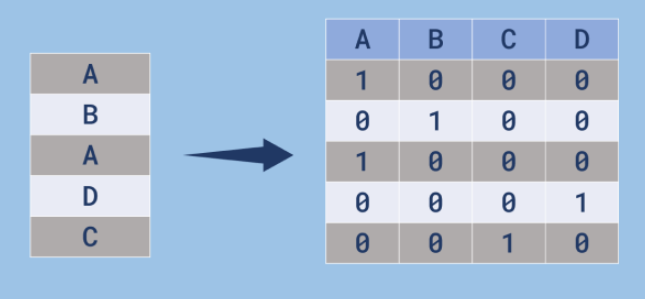

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
columnas = X.columns

In [22]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridad', 'default', 'prestatario']
),
    remainder = 'passthrough',
    sparse_threshold=0)
    #force_int_remainder_cols=False)

In [23]:
X = one_hot.fit_transform(X)

In [24]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

## Luri:
¡Hola! Claro, puedo ayudarte con eso.

Imagina que estás organizando una fiesta y necesitas clasificar a tus invitados según diferentes características para planificar mejor el evento.

* ### Estado Civil (Casado, Soltero, Divorciado):

**Analogía**:
 Imagina que tienes tres mesas: una para "Casados", otra para "Solteros" y otra para "Divorciados". Cada invitado solo puede sentarse en una de estas mesas. No puedes simplemente asignar números a las mesas (1 para casados, 2 para solteros, 3 para divorciados) porque no quieres que el modelo piense que los divorciados son "más importantes" solo por tener un número más alto.

* ### One-Hot Encoding:
 En lugar de eso, creas una mesa para cada categoría. Si un invitado está casado, le pones un "1" en la mesa de "Casados" y "0" en las otras mesas. Así, cada mesa representa una característica sin implicar ninguna jerarquía.

* ### Escolaridad (Primaria, Secundaria, Superior):

Analogía: Similar al estado civil, tienes tres mesas que representan los niveles de escolaridad. Aunque hay un orden jerárquico (primaria < secundaria < superior), no quieres que el modelo asuma que "superior" es inherentemente "mejor" solo por ser el nivel más alto.

* ### One-Hot Encoding:
 De nuevo, usas el mismo enfoque. Si alguien tiene "Superior", le asignas un "1" en la mesa de "Superior" y "0" en las otras mesas.

* ### Variables Binarias (Default - Sí/No, Prestatario - Sí/No):

* ### Analogía:
 Aquí tienes dos preguntas simples: "¿Tiene deudas?" y "¿Es prestatario?". Cada pregunta tiene dos respuestas posibles: "Sí" o "No".

* ### One-Hot Encoding:
 Para estas, podrías simplemente usar 1 para "Sí" y 0 para "No". Sin embargo, el método drop='if_binary' en OneHotEncoder automáticamente convierte estas columnas en una sola columna donde 1 representa "Sí" y 0 representa "No", evitando redundancia.

* ### ColumnTransformer:

* ### Analogía:
 Imagina que tienes un chef (el ColumnTransformer) que sabe cómo preparar diferentes ingredientes (columnas) de manera específica. Algunos ingredientes necesitan ser cortados en cubitos (One-Hot Encoding), mientras que otros pueden dejarse tal cual (las columnas numéricas). El chef se asegura de que cada ingrediente se prepare de la manera correcta antes de combinarlos en un plato final.

* ### Remainder='passthrough':

* ### Analogía:
 El chef tiene instrucciones específicas para ciertos ingredientes, pero no quiere ignorar los demás. Remainder='passthrough' significa que el chef dejará los ingredientes restantes (las columnas numéricas) tal como están, sin modificarlos.

* ### Sparse_threshold=0:

* ### Analogía:
 Imagina que el chef está creando una receta y quiere asegurarse de que todos los ingredientes estén incluidos, incluso si algunos están en pequeñas cantidades. Sparse_threshold=0 asegura que no se elimine ninguna información, incluso si hay muchos "ceros" en la representación de los datos.
 
En resumen, el objetivo es transformar datos categóricos en un formato numérico que los modelos de Machine Learning puedan entender, sin introducir sesgos innecesarios. ¿Te gustaría que te proporcionara algún ejercicio o ejemplo adicional para consolidar tu comprensión?

##  05 Para saber más: One Hot Encoding
Los algoritmos de Machine Learning no pueden comprender información que no esté en formato numérico. Por lo tanto, si se desea utilizar variables categóricas en modelos, es necesario que pasen por algún tipo de tratamiento para que estén en formato numérico. Esto no significa que se convertirán en variables numéricas, solo que estarán en un formato que sea comprendido por los modelos.

Así, estas transformaciones deben preservar la información real de las categorías de la mejor manera posible, sin introducir sesgos en el modelo y sin información que esté alejada de la realidad.

La forma ideal de hacer este tipo de transformación, que mantiene la información original, se conoce como one hot encoding. Esta acción transforma cada una de las clases de las variables categóricas en nuevas columnas, utilizando el valor 0 para representar la ausencia de la característica y 1 para la presencia de la característica en la muestra de la base de datos. Observa en detalle el dinamismo de este proceso en la imagen a continuación.

![hot.png](/home/pol/Escritorio/ipynb-alura/assets/hot.png)

Hay una forma muy simple de hacer esta transformación usando la biblioteca pandas, a partir de la función `pd.get_dummies()`, sin embargo, no es un método muy recomendado cuando estamos trabajando con Machine Learning, ya que esta función no puede abstraer y ejecutar la misma transformación para un nuevo dato. Si tienes una nueva información que pertenece solo a una de las clases de una variable objetivo, el proceso de `get_dummies` no será capaz de generar las otras columnas provenientes de las otras clases. Esto se convierte en un problema para el modelo, ya que espera todas las características para realizar una predicción.

El método más recomendado para realizar la transformación en proyectos de Machine Learning es el `OneHotEncoder`. En un primer momento, con los datos iniciales, comienza su acción comprendiendo las características de los datos y genera las nuevas columnas para cada clase. Además, almacena la regla capaz de hacer este procedimiento para nuevos datos. Por lo tanto, en el proceso de transformación de un nuevo dato, puede crear todas las columnas necesarias, aunque este nuevo dato tenga solo la información de una de las clases.

## Luri y GPT
## 🎯 Ejemplo de One-Hot Encoding

Supongamos que tienes una columna en tu conjunto de datos llamada `Color` con las siguientes categorías:

**"Rojo", "Verde" y "Azul"**

Al aplicar **One-Hot Encoding**, transformarías esa columna en tres nuevas columnas binarias:

- `Color_Rojo`
- `Color_Verde`
- `Color_Azul`

### 🔄 Transformación de los datos

| Color | Color_Rojo | Color_Verde | Color_Azul |
|-------|------------|-------------|------------|
| Rojo  |     1      |      0      |     0      |
| Verde |     0      |      1      |     0      |
| Azul  |     0      |      0      |     1      |
| Rojo  |     1      |      0      |     0      |
| Verde |     0      |      1      |     0      |

### ✅ ¿Para qué sirve?

Cada categoría de la columna original `Color` se convierte en una columna distinta.  
Un `1` indica la presencia de esa categoría en la fila, y un `0` su ausencia.

Esto permite representar variables categóricas de forma que los algoritmos de *Machine Learning* puedan comprenderlas y utilizarlas en el entrenamiento de modelos.


In [50]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

## 06 Transformando la variable respuesta


In [25]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

onehotencoder__estado_civil_casado (a)  \
0                                        1.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   
...                                      ...   
1263                                     0.0   
1264                                     0.0   
1265                                     0.0   
1266                                     1.0   
1267                                     0.0   

      onehotencoder__estado_civil_divorciado (a)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            0.0   
...                                          ...   
1263                                         0.0   
1264                                         0.0   
1265                                         0.0   
1266                                         0.0   
1267                                         0.0   

      onehotencoder__estado_civil_soltero (a)  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
1263                                      1.0   
1264                                      1.0   
1265                                      1.0   
1266                                      0.0   
1267                                      1.0   

      onehotencoder__escolaridad_primaria  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
1263                                  0.0   
1264                                  0.0   
1265                                  0.0   
1266                                  0.0   
1267                                  0.0   

      onehotencoder__escolaridad_secundaria  \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   
4                                       1.0   
...                                     ...   
1263                                    0.0   
1264                                    0.0   
1265                                    0.0   
1266                                    0.0   
1267                                    0.0   

      onehotencoder__escolaridad_superior  onehotencoder__default_si  \
0                                     1.0                        0.0   
1                                     0.0                        0.0   
2                                     1.0                        0.0   
3                                     1.0                        0.0   
4                                     0.0                        0.0   
...                                   ...                        ...   
1263                                  1.0                        0.0   
1264                                  1.0                        0.0   
1265                                  1.0                        0.0   
1266                                  1.0                        0.0   
1267                                  1.0                        0.0   

      onehotencoder__prestatario_si  remainder__edad  remainder__saldo  \
0                               0.0             45.0             242.0   
1                               0.0             42.0            1289.0   
2                     

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoder = LabelEncoder()

In [54]:
y = label_encoder.fit_transform(y)

In [55]:
y

array([1, 1, 0, ..., 1, 1, 1])

## Luri y GPT:
# 🎉 Analogía para Entender Variables y Transformaciones en Machine Learning

Imagina que estás organizando una fiesta y necesitas clasificar a tus invitados en dos grupos:  
✅ Los que les gusta el baile  
❌ Los que no

---

## 🧠 Variables Explicativas (Características de los Invitados)

Piensa en las **variables explicativas** como las características de cada invitado que te ayudan a predecir si les gusta bailar o no.  
Algunos ejemplos:

- Edad  
- Género  
- Estilo de música favorito  
- Si han bailado antes en otras fiestas  

👉 En Machine Learning, estas variables se transforman para que la computadora pueda entenderlas mejor.  
Es como convertir la información de cada invitado en **números** que la computadora pueda procesar.

---

## 🔧 Transformación de Variables Explicativas

Aquí es donde preparas la información de tus invitados para que sea más fácil de usar.  
Por ejemplo:

- Pop = 1  
- Rock = 2  
- Reguetón = 3

🛠️ En clases, esto se hace con herramientas como `get_feature_names_out`, que ayudan a entender cómo se codificaron las categorías.

---

## 🎯 Variable de Respuesta (¿Bailan o No?)

La **variable de respuesta** es si el invitado **realmente baila o no** en la fiesta.  
En términos de ML, es lo que estamos tratando de **predecir o clasificar**.

---

## 🔄 Transformación de la Variable de Respuesta

Para que la computadora entienda la respuesta, también la transformamos en números:

- "Sí" (baila) → `1`  
- "No" (no baila) → `0`

📌 Esto se hace con `LabelEncoder`, que convierte texto en números fácilmente interpretables por los algoritmos.

---

## 🧪 Preparación para el Modelado

Una vez que tienes todas las características de los invitados y la información de si bailan o no en **formato numérico**, estás listo para:

✅ Usar un modelo de **Machine Learning**  
✅ Predecir quiénes bailarán en futuras fiestas 🎉

---

¿Querés que explique algún punto con otro ejemplo o gráfico?



##  07 Variable objetivo
En problemas de clasificación, la variable objetivo es de tipo categórica. Esto indica la necesidad de una transformación en esta variable para que sea utilizada en algoritmos de Machine Learning, en caso de que la base de datos ya no esté transformada.

Seleccione la alternativa que indica el método de la biblioteca Scikit-Learn para hacer la transformación de la variable objetivo categórica a valores numéricos:

![label.png](/home/pol/Escritorio/ipynb-alura/assets/label.png)

##  08 Desafío: hora de la práctica
Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

1. Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.

2. Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el `OneHotEncoder`, utilizando el parámetro `drop='if_binary'` si alguna variable tiene solo 2 categorías.

3. La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método `LabelEncoder` para realizar la transformación de la variable churn.

La búsqueda de la solución a cualquier desafío comienza con la exploración y comprensión profunda del problema. Tómate un tiempo para comprender la necesidad de cada cuestión y desarrolla, con base en tu aprendizaje, las posibles soluciones. Además, recuerda que la práctica constante es la clave para el perfeccionamiento. A medida que aplicas lo que aprendes, los conceptos se solidifican y se convierten en parte de tu conocimiento práctico.

 Discutir en el Foro


## Opinión del instructor

### Solución para los desafíos
1. - Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna churn. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

Para almacenar la columna churn en y, podemos usar la selección de columnas de la biblioteca pandas. Lo mismo se puede hacer para seleccionar las columnas en x, sin embargo, de forma más simple, podemos usar el método drop para eliminar la columna churn y almacenar todo lo demás en x:


In [1]:
import pandas as pd
datos = pd.read_csv('../data/churn.csv')
datos.head()

id_cliente  score_credito     pais sexo_biologico  edad  años_de_cliente  \
0    15634602            619  Francia          Mujer    42                2   
1    15647311            608   España          Mujer    41                1   
2    15619304            502  Francia          Mujer    42                8   
3    15701354            699  Francia          Mujer    39                1   
4    15737888            850   España          Mujer    43                2   

       saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0       0.00                     1                      1               1   
1   83807.86                     1                      0               1   
2  159660.80                     3                      1               0   
3       0.00                     2                      0               0   
4  125510.82                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [2]:
x = datos.drop('churn', axis = 1)
y = datos['churn'] 

¡Listo! Ahora tenemos la separación de las variables para indicar al modelo cuál es la respuesta y cuáles son las columnas que explican esa respuesta.

2. - Para realizar la transformación de las variables categóricas, primero necesitamos identificar cuáles son las columnas que requieren este tipo de transformación.

En la base de datos de churn, las columnas categóricas son:

* pais: 3 categorías
* sexo_biologico: 2 categorías
* tiene_tarjeta_credito: 2 categorías
* miembro_activo: 2 categorías
La columna país necesita pasar por una transformación para que al final se generen 3 columnas, una para cada país distinto. Cada columna indicará con 0 si el registro no es del respectivo país y 1 si lo es. Como las demás columnas solo necesitan cambiar los valores de las dos categorías a 0 y 1, podemos usar el parámetro drop = 'if_binary' para que al final del proceso se elimine una de las columnas generadas y se mantenga solo una.

Vamos a importar las funciones y usar el método make_column_transformer para indicar cuáles son las columnas que necesitan el tratamiento de datos y cuáles no:

In [4]:
x

id_cliente  score_credito      pais sexo_biologico  edad  \
0       15634602            619   Francia          Mujer    42   
1       15647311            608    España          Mujer    41   
2       15619304            502   Francia          Mujer    42   
3       15701354            699   Francia          Mujer    39   
4       15737888            850    España          Mujer    43   
...          ...            ...       ...            ...   ...   
9995    15606229            771   Francia         Hombre    39   
9996    15569892            516   Francia         Hombre    35   
9997    15584532            709   Francia          Mujer    36   
9998    15682355            772  Alemania         Hombre    42   
9999    15628319            792   Francia          Mujer    28   

      años_de_cliente      saldo  servicios_adquiridos  tiene_tarjeta_credito  \
0                   2       0.00                     1                      1   
1                   1   83807.86                     1                      0   
2                   8  159660.80                     3                      1   
3                   1       0.00                     2                      0   
4                   2  125510.82                     1                      1   
...               ...        ...                   ...                    ...   
9995                5       0.00                     2                      1   
9996               10   57369.61                     1                      1   
9997                7       0.00                     1                      0   
9998                3   75075.31                     2                      1   
9999                4  130142.79                     1                      1   

      miembro_activo  salario_estimado  
0                  1         101348.88  
1                  1         112542.58  
2                  0         113931.57  
3                  0          93826.63  
4                  1          79084.10  
...              ...               ...  
9995               0          96270.64  
9996               1         101699.77  
9997               1          42085.58  
9998               0          92888.52  
9999               0          38190.78  

[10000 rows x 11 columns]

In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder 

In [7]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

Para visualizar mejor los datos transformados, podemos almacenar el nombre de las columnas originales para obtener el nombre de las columnas después de la transformación. Luego de esto, usaremos el método fit_transform para realizar la transformación y visualizar los datos en un DataFrame:



In [8]:
columnas = x.columns 

In [9]:
x = one_hot.fit_transform(x)

In [10]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__id_cliente',
       'remainder__score_credito', 'remainder__edad',
       'remainder__años_de_cliente', 'remainder__saldo',
       'remainder__servicios_adquiridos', 'remainder__salario_estimado'],
      dtype=object)

Resultado en el nombre de las columnas transformadas:

In [11]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(columnas))

onehotencoder__sexo_biologico_Mujer  onehotencoder__pais_Alemania  \
0                                     1.0                           0.0   
1                                     1.0                           0.0   
2                                     1.0                           0.0   
3                                     1.0                           0.0   
4                                     1.0                           0.0   
...                                   ...                           ...   
9995                                  0.0                           0.0   
9996                                  0.0                           0.0   
9997                                  1.0                           0.0   
9998                                  0.0                           1.0   
9999                                  1.0                           0.0   

      onehotencoder__pais_España  onehotencoder__pais_Francia  \
0                            0.0                          1.0   
1                            1.0                          0.0   
2                            0.0                          1.0   
3                            0.0                          1.0   
4                            1.0                          0.0   
...                          ...                          ...   
9995                         0.0                          1.0   
9996                         0.0                          1.0   
9997                         0.0                          1.0   
9998                         0.0                          0.0   
9999                         0.0                          1.0   

      onehotencoder__tiene_tarjeta_credito_1  onehotencoder__miembro_activo_1  \
0                                        1.0                              1.0   
1                                        0.0                              1.0   
2                                        1.0                              0.0   
3                                        0.0                              0.0   
4                                        1.0                              1.0   
...                                      ...                              ...   
9995                                     1.0                              0.0   
9996                                     1.0                              1.0   
9997                                     0.0                              1.0   
9998                                     1.0                              0.0   
9999                                     1.0                              0.0   

      remainder__id_cliente  remainder__score_credito  remainder__edad  \
0                15634602.0                     619.0             42.0   
1                15647311.0                     608.0             41.0   
2                15619304.0                     502.0             42.0   
3                15701354.0                     699.0             39.0   
4                15737888.0                     850.0             43.0   
...                     ...                       ...              ...   
9995             15606229.0                     771.0             39.0   
9996             15569892.0                     516.0             35.0   
9997             15584532.0                     709.0             36.0   
9998             15682355.0                     772.0             42.0   
9999             15628319.0                     792.0             28.0   

      remainder__años_de_cliente  remainder__saldo  \
0                            2.0              0.00   
1                            1.0          83807.86   
2                            8.0         159660.80   
3                            1.0              0.00   
4                            2.0         125510.82   
...                          ...               ...   
9995                         5.0              0.00   
9996                        10

Resultado de las 5 primeras filas del DataFrame:

3. - Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el LabelEncoder, que es el método recomendado para esta tarea. El proceso para utilizar este método es bastante simple. Primero tenemos que importar la función, luego inicializar en una variable y, por último, usar el método fit_transform en los datos y:

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
y = label_encoder.fit_transform(y)

Resolver desafíos y encontrar soluciones es una parte fundamental de cualquier viaje de aprendizaje, especialmente en Machine Learning. La solución a cualquier desafío comienza con el análisis y la acción exploratoria del problema. Por lo tanto, sigue avanzando y aprovecha cada desafío como una oportunidad para desarrollar tus habilidades en análisis de datos.

##  09 ¿Qué aprendimos?
En esta clase, aprendiste a:

* **Utilizar la biblioteca Scikit-Learn para hacer transformaciones de datos;**

* **Hacer la separación de las variables explicativas y la variable objetivo;**

* **Realizar la transformación de variables categóricas a formato numérico con one hot encoding;**

* **Transformar la variable objetivo a formato numérico con el LabelEncoder.**

-----

# 03 - Ajuste de modelos

# 3.1 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [15]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

## Luri + Mistral IA:
# Analogía: Enseñando a un niño a diferenciar manzanas y naranjas

¡Hola! En esta clase, aprendemos a preparar nuestros datos para que un modelo de Machine Learning pueda aprender de ellos y hacer predicciones precisas. Imagina que estás enseñando a un niño a diferenciar entre manzanas y naranjas.

## Conjunto de datos
- Tienes una cesta llena de manzanas y naranjas (tus datos).

## Entrenamiento
- Le muestras al niño algunas manzanas y naranjas, diciéndole: "Esto es una manzana" y "Esto es una naranja".
- El niño aprende a identificar las características de cada fruta (color, forma, tamaño).

## Prueba
- Después de que el niño ha aprendido, le das una nueva fruta que nunca ha visto antes y le preguntas: "¿Qué es esto?".
- Así compruebas si realmente ha aprendido a diferenciar las frutas o si solo estaba memorizando las que le mostraste.

## En Machine Learning
Hacemos algo similar:

### Datos de entrenamiento
- Usamos una parte de nuestros datos para "enseñar" al modelo.
- El modelo analiza estos datos y aprende a encontrar patrones que relacionan las características de los datos con la respuesta correcta.

### Datos de prueba
- Usamos otra parte de los datos para "probar" el modelo.
- El modelo intenta predecir la respuesta correcta para estos datos, y comparamos sus predicciones con las respuestas reales para ver si está funcionando bien.

## Importancia de la separación de datos
- Es importante separar los datos en entrenamiento y prueba porque si usamos los mismos datos para entrenar y probar, el modelo podría simplemente memorizar las respuestas en lugar de aprender a generalizar a nuevos datos.
- ¡Es como si le preguntaras al niño sobre las mismas manzanas y naranjas que ya le mostraste!

## Parámetro stratify
- El parámetro `stratify` es como asegurarte de que la cesta de entrenamiento y la cesta de prueba tengan la misma proporción de manzanas y naranjas.
- Esto es importante para que el modelo no aprenda a sesgarse hacia una fruta en particular.

¿Te gustaría que te explicara algún punto en más detalle o te proporcionara otro ejemplo?


##  03 Para saber más: Overfitting y Underfitting

Una tarea muy importante para la evaluación de modelos de machine learning es la división de los datos entre entrenamiento y prueba. El conjunto de entrenamiento se utiliza para que el modelo comprenda patrones y relaciones en los datos para que pueda crear una regla para hacer predicciones. El conjunto de prueba, por su parte, se reserva para evaluar el desempeño del modelo en datos que no se utilizaron en el entrenamiento, simulando la capacidad del modelo de generalizar a nuevos datos.

Existen dos conceptos que están muy ligados a esta división de los datos y que son muy relevantes en los proyectos de machine learning: el overfitting y el underfitting.

### Overfitting (Sobreajuste):

El overfitting ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento. Esto indica que el modelo capturó no solo el patrón de los datos, sino también ruidos y variaciones aleatorias que están presentes en los datos utilizados para el entrenamiento. Como resultado de esto, el modelo tiene un resultado muy bueno al ser evaluado con los datos de entrenamiento, sin embargo, su desempeño en los datos de prueba o en datos nuevos cae considerablemente.

### Características del overfitting:

* Error muy bajo en las predicciones en datos de entrenamiento;
* Error muy alto en las predicciones en datos de prueba;
* Modelo muy complejo que intenta memorizar los datos de entrenamiento en lugar de aprender el patrón de los datos.

### Underfitting (Subajuste):

El underfitting ocurre cuando un modelo es muy simple y no puede capturar el patrón presente en los datos. Esto indica que el modelo no fue capaz de aprender las relaciones existentes en los datos de entrenamiento y termina teniendo un desempeño deficiente tanto en datos de entrenamiento como de prueba.

### Características del underfitting:

* Error muy alto en las predicciones en datos de entrenamiento;
* Error muy alto en las predicciones en datos de prueba;
* Modelo muy simple que no puede representar bien los datos.

El objetivo principal de la creación de modelos de machine learning es encontrar un equilibrio entre el overfitting y el underfitting, para que haya un ajuste adecuado. Un modelo bien ajustado es capaz de aprender el patrón de los datos y generalizar a nuevos datos, haciendo predicciones con consistencia sin ser demasiado influenciado por los ruidos presentes en los datos de entrenamiento.

 Discutir en el Foro


## 04 Modelo de referencia - Baseline


## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [27]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.6025236593059937

## Luri + Mistral IA:

# Analogía: Aprendiendo a cocinar un nuevo plato con DummyClassifier

¡Hola! ¡Claro que sí!

Imagina que eres un chef que está aprendiendo a cocinar un nuevo plato: "Clientes que se adhieren a un programa de inversión". Antes de experimentar con ingredientes exóticos y técnicas culinarias avanzadas (modelos de Machine Learning complejos), necesitas una receta básica, algo simple para tener un punto de referencia.

## DummyClassifier: La receta de cocina para principiantes

Aquí es donde entra el `DummyClassifier`, es como tu "receta de cocina para principiantes". En lugar de analizar los ingredientes (datos del cliente) y sus interacciones de manera inteligente, simplemente sigue una regla muy simple:

- Si la mayoría de tus clientes **NO** se adhieren al programa, siempre predice que **NO** se adherirán.
- Si la mayoría de tus clientes **SÍ** se adhieren al programa, siempre predice que **SÍ** se adherirán.

Es como si siempre prepararas el plato más popular de tu restaurante, sin importar lo que te pidan los clientes.

## ¿Por qué es útil esta receta básica?

### Punto de comparación
- Te da una idea de qué tan bien podrías hacerlo simplemente adivinando al azar o siguiendo la opción más común.

### Medir el progreso
- Si tus recetas más elaboradas (modelos de Machine Learning) no superan a esta receta básica, ¡sabes que algo anda mal!
- Tal vez estás usando ingredientes equivocados (datos incorrectos) o cocinando mal (entrenando mal el modelo).

## Resumen
En resumen, el `DummyClassifier` es como tu "receta de cocina para principiantes" en el mundo del Machine Learning. Te da un punto de referencia simple para evaluar si tus modelos más avanzados realmente están aprendiendo algo útil de los datos.
## 

##  05 Utilidad del modelo de base
En proyectos de machine learning, el objetivo principal es construir un modelo que realice la predicción de las categorías de una variable objetivo. El modelo más simple de clasificación se conoce como modelo de base o modelo dummy. Este modelo realiza la clasificación a partir de la categoría de la variable objetivo que tiene mayor frecuencia, prediciendo todos los valores con el mismo resultado.

Seleccione la alternativa que indica el principal objetivo de un modelo de base (modelo dummy) en clasificación:

![dummy.png](/home/pol/Escritorio/ipynb-alura/assets/dummy.png)

## 06 Árboles de decisión


## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [31]:
modelo_arbol.predict(X_test)

array(['no', 'si', 'no', 'si', 'no', 'no', 'no', 'no', 'si', 'si', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'si', 'no', 'no',
       'si', 'no', 'no', 'si', 'no', 'no', 'si', 'si', 'no', 'si', 'no',
       'no', 'no', 'no', 'no', 'no', 'si', 'si', 'no', 'si', 'no', 'no',
       'si', 'no', 'no', 'si', 'no', 'no', 'no', 'no', 'si', 'si', 'no',
       'no', 'si', 'no', 'no', 'si', 'si', 'si', 'no', 'no', 'si', 'si',
       'si', 'no', 'no', 'si', 'no', 'no', 'no', 'si', 'si', 'no', 'no',
       'si', 'si', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'si', 'si', 'no', 'si', 'no', 'no', 'si', 'no', 'no', 'no',
       'no', 'si', 'no', 'no', 'si', 'no', 'si', 'no', 'si', 'no', 'si',
       'si', 'si', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'si', 'no', 'no', 'si', 'si', 'si', 'si', 'si', 'si', 'no', 'si',
       'si', 'no', 'no', 'no', 'no', 'no', 'si', 'si', 'si', 'si', 'no',
       'no', 'no', 'no', 'no', 'si', 'no', 'si', 'n

In [32]:
modelo_arbol.score(X_test, y_test)

0.6656151419558359

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [34]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

[Text(0.5428645412287793, 0.98, 'ultimo_contacto <= 248.5\ngini = 0.478\nsamples = 951\nvalue = [575, 376]\nclass = no'),
 Text(0.2825005052546483, 0.94, 'edad <= 59.5\ngini = 0.278\nsamples = 480\nvalue = [400, 80]\nclass = no'),
 Text(0.14947958771220696, 0.9, 'ultimo_contacto <= 86.5\ngini = 0.253\nsamples = 458\nvalue = [390, 68]\nclass = no'),
 Text(0.05173807599029911, 0.86, 'divorciado (a) <= 0.5\ngini = 0.061\nsamples = 127\nvalue = [123, 4]\nclass = no'),
 Text(0.038803556992724336, 0.82, 'edad <= 34.5\ngini = 0.034\nsamples = 114\nvalue = [112, 2]\nclass = no'),
 Text(0.03233629749393695, 0.78, 'ct_contactos <= 3.5\ngini = 0.111\nsamples = 34\nvalue = [32, 2]\nclass = no'),
 Text(0.025869037995149554, 0.74, 'saldo <= 194.0\ngini = 0.18\nsamples = 20\nvalue = [18, 2]\nclass = no'),
 Text(0.019401778496362168, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = no'),
 Text(0.03233629749393695, 0.7, 'saldo <= 216.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = no'),
 

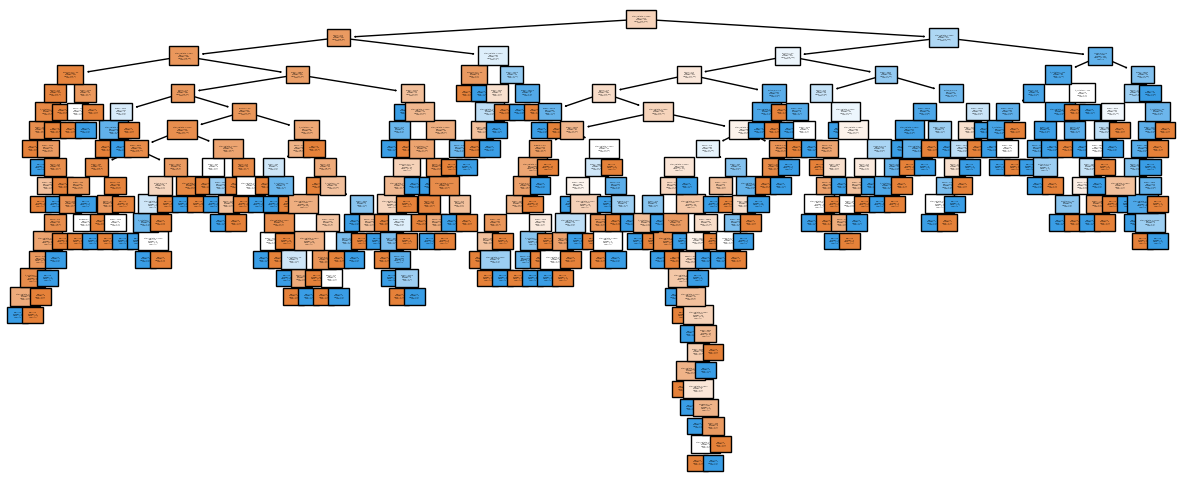

In [35]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['no', 'si'], fontsize = 1, feature_names = valores_columnas)

In [36]:
modelo_arbol.score(X_train, y_train)

1.0

## Luri:
# Analogías: Árboles de Decisión

¡Hola! ¡Claro que sí!

En esta clase, estamos viendo cómo los árboles de decisión nos ayudan a clasificar datos, y para entenderlo mejor, podemos usar algunas analogías:

## El juego de las 20 preguntas
- Imagina que estás jugando a las 20 preguntas para adivinar un animal.
- Cada pregunta que haces (¿Es mamífero? ¿Tiene plumas?) es como una decisión en el árbol.
- Dependiendo de la respuesta, sigues una rama diferente hasta que adivinas el animal.
- El árbol de decisión hace algo similar, pero con datos.

## Un embudo de decisiones
- Piensa en un embudo grande donde echas un montón de objetos mezclados (manzanas y peras).
- El árbol de decisión es como una serie de filtros dentro del embudo.
- Cada filtro separa los objetos según una característica (color, forma, tamaño) hasta que al final tienes los objetos clasificados en diferentes recipientes.

## Un mapa de ruta
- Imagina que estás planeando un viaje y tienes que tomar decisiones en cada cruce.
- En cada cruce, eliges un camino basado en una señal (¿Ir al norte o al sur?).
- El árbol de decisión es como este mapa, donde cada cruce es una pregunta sobre los datos, y cada camino te lleva a una clasificación diferente.

## El detective
- Imagina que eres un detective intentando resolver un caso.
- Recopilas pistas y haces preguntas para descartar sospechosos.
- Cada pregunta que haces es como una decisión en el árbol.
- Al final, llegas a una conclusión basada en las respuestas.

¿Te gustaría que profundizáramos en alguna de estas analogías o te proporcionara más ejemplos?


##  07 Para saber más: cómo funciona el árbol de decisión

El árbol de decisión es un algoritmo de machine learning supervisado que tiene una buena interpretabilidad. Esto significa que es posible tener una comprensión fácil de los pasos que se realizaron para llegar al resultado final de la predicción del modelo. Estos pasos pueden ser representados de forma visual, a partir de un diagrama que indica cada una de las decisiones que se tomaron para llegar a la clasificación de un dato.

Para llegar a una regla que clasifique los datos con una buena tasa de acierto, las decisiones del árbol no pueden ser totalmente aleatorias. Debe haber un sentido en cada elección hecha por el árbol de decisión. Ahora entendamos cómo se hacen estas elecciones:

El primer paso es seleccionar una columna de la base de datos que se utilizará para dividir los datos en 2 subconjuntos. El objetivo es que la mayor cantidad posible de datos se separe en relación con la variable objetivo. Entonces, el mejor resultado posible sería si uno de los subconjuntos tuviera solo datos de una categoría de la variable objetivo y el otro subconjunto tuviera solo datos de la otra categoría restante. Para hacer la mejor elección posible, se prueban diferentes columnas y valores, y aquella que proporcione la mejor separación se elige como la primera regla del árbol de decisión.

Para definir qué es una buena separación, se realizan cálculos matemáticos para obtener la proporción de datos de cada categoría de la variable objetivo dentro de los subconjuntos. El resultado de este cálculo se conoce como métrica de impureza. Existen diferentes tipos de métricas, siendo las más utilizadas la entropía y el índice de Gini. A continuación, se presentan las características de cada una.

### Índice Gini

Este índice informa el grado de heterogeneidad de los datos. Su objetivo es medir la frecuencia de que un elemento aleatorio de un nodo sea etiquetado de manera incorrecta. En otras palabras, este índice cuantifica y determina la impureza de un nodo mediante el siguiente cálculo:

![gini.png](/home/pol/Escritorio/ipynb-alura/assets/gini.png)

Donde:

* `P(i)` representa la frecuencia relativa de las clases en cada uno de los nodos;
* `k` es el número de clases.
Si el índice Gini es igual a 0, esto indica que el nodo es puro. Sin embargo, si su valor se aproxima más al valor 1, el nodo es impuro.

### Entropía

La idea básica de la entropía es medir el desorden de los datos de un nodo mediante la variable clasificadora. Así como el índice de Gini, se utiliza para caracterizar la impureza de los datos y puede ser calculada mediante la siguiente fórmula:

![gini-1.png](/home/pol/Escritorio/ipynb-alura/assets/gini-1.png)

Donde:

* `pi` representa la proporción de datos en el conjunto de datos, pertenecientes a la clase específica i;
* `c` es el número de clases.

Después de realizar la primera elección de división, el proceso se repite para cada subconjunto hasta que se alcance una condición de parada o que todos los subconjuntos finales estén totalmente puros, es decir, con solo datos de una de las clases de la variable objetivo. A partir de la regla generada, nuevos datos pueden ser clasificados pasando por cada una de las decisiones del árbol hasta llegar a la elección final.

Si deseas saber más sobre el árbol de decisión, puedes consultar la documentación de la biblioteca Scikit-Learn, que tiene una explicación detallada de cómo funciona y también de la función implementada con el algoritmo:

Comprendiendo la estructura del árbol de decisión(https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

DecisionTreeClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## Luri + Mistral IA:
# Ejemplo de Árbol de Decisión

¡Por supuesto! Para ilustrar cómo funciona un árbol de decisión, vamos a considerar un ejemplo sencillo:

Imagina que queremos predecir si un cliente va a comprar un producto basándonos en dos características: si el cliente tiene más de 30 años y si tiene ingresos superiores a 50.000€.

## Inicio
- Tenemos un conjunto de datos de clientes con información sobre su edad, ingresos y si compraron o no el producto.

## Primera división
- El árbol de decisión analiza todas las características para encontrar la que mejor separa a los clientes que compraron el producto de los que no lo compraron.
- Supongamos que la característica "Ingresos > 50.000€" es la que mejor separa los datos.
- Entonces, el árbol crea una primera división basada en esta característica.
  - Si el cliente tiene ingresos > 50.000€, va por una rama del árbol.
  - Si el cliente tiene ingresos <= 50.000€, va por otra rama del árbol.

## Segunda división
- Ahora, para cada una de las ramas resultantes de la primera división, el árbol busca otra característica que mejore aún más la separación.
- Por ejemplo, en la rama de clientes con ingresos > 50.000€, el árbol podría usar la característica "Edad > 30 años" para crear una nueva división.
  - Si el cliente tiene ingresos > 50.000€ y edad > 30 años, va por una rama.
  - Si el cliente tiene ingresos > 50.000€ y edad <= 30 años, va por otra rama.

## Hojas
- El proceso de división continúa hasta que se cumple una condición de parada.
- Por ejemplo, podríamos detener la división cuando una rama tiene solo clientes que compraron el producto o solo clientes que no lo compraron.
- Estas ramas finales se llaman "hojas" y representan la predicción del árbol.

### Ejemplo de Hojas
- Hoja 1: Clientes con ingresos > 50.000€ y edad > 30 años: Predicción = Comprará el producto.
- Hoja 2: Clientes con ingresos > 50.000€ y edad <= 30 años: Predicción = No comprará el producto.
- Y así sucesivamente para las otras ramas del árbol.

## Resumen
En resumen, el árbol de decisión crea una serie de preguntas basadas en las características de los datos para dividir los clientes en grupos cada vez más homogéneos en relación con la variable objetivo (si compraron o no el producto). Al final, cada hoja del árbol representa una predicción sobre si un nuevo cliente comprará o no el producto, basándose en sus características.


## 08 Parametrizando el modelo de árbol


In [37]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [38]:
modelo_arbol.score(X_train, y_train)

0.7613038906414301

In [39]:
modelo_arbol.score(X_test, y_test)

0.7160883280757098

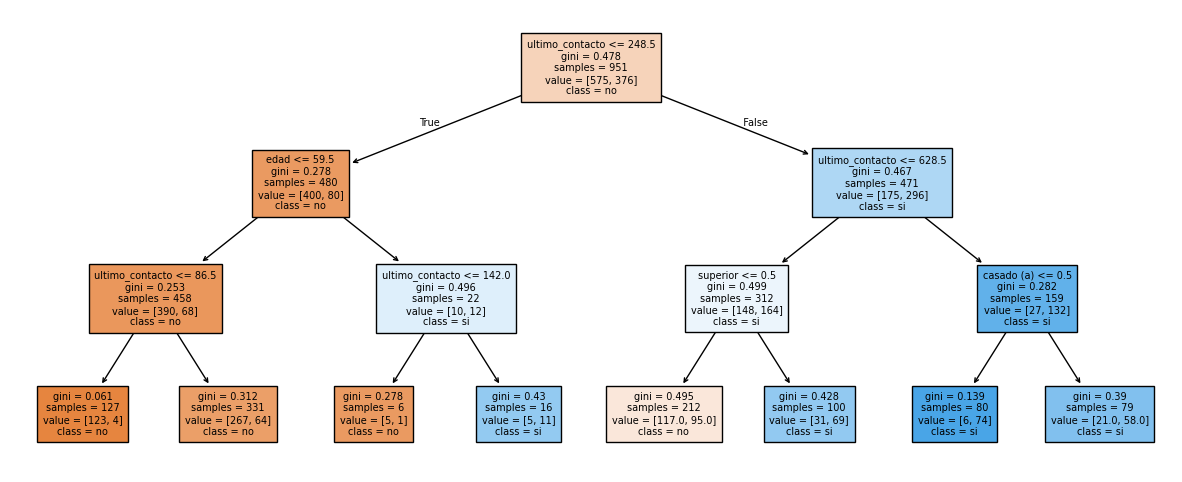

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['no', 'si'], fontsize = 7, feature_names = valores_columnas)

## Luri + Mistral IA:
# Ajuste de un Modelo de Árbol de Decisión

¡Hola! En esta clase, ajustamos un modelo de árbol de decisión para mejorar su rendimiento. Aquí tienes una analogía para entenderlo mejor:

Imagina que eres un chef que está aprendiendo a hacer una receta nueva, como un pastel.

## Árbol de Decisión sin Parámetros
- Al principio, sigues la receta al pie de la letra, sin modificar nada.
- El pastel sale bien para las pruebas que haces en casa, pero cuando lo llevas a un concurso (datos nuevos), no le gusta a los jueces.
- Esto es como el overfitting: el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.

## Ajuste de Parámetros (max_depth)
- Decides limitar la complejidad de la receta.
- Por ejemplo, reduces el número de capas del pastel a tres (max_depth=3).
- Ahora, el pastel es más sencillo, pero gusta más a los jueces en el concurso.
- Esto es como ajustar la profundidad máxima del árbol: evitas que se adapte demasiado a los datos de entrenamiento y mejoras su capacidad de generalización.

## Resumen
En resumen, ajustar los parámetros de un modelo de árbol de decisión es como refinar una receta para que funcione bien en diferentes situaciones, no solo en la cocina de tu casa.

¿Te gustaría que te explicara algún otro concepto de la clase?


##  09 Desafío: hora de la práctica
Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

1. La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

2. Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

3. El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

Para desarrollar este desafío, dedica un tiempo a reflexionar y explorar. Analiza cuidadosamente los datos y las instrucciones de los enunciados de cada pregunta. La colaboración puede proporcionar ideas valiosas. Por eso, no dudes en colaborar con tus compañeros en la comunidad, intercambiar ideas y compartir soluciones en conjunto.

## Opinión del instructor

Solución para los desafíos

1. - Para separar el conjunto de datos entre entrenamiento y prueba, necesitamos utilizar el método train_test_split de la biblioteca Scikit-Learn. Primero, vamos a importar la función con el código:

In [ ]:
from sklearn.model_selection import train_test_split

Ahora, vamos a utilizar el método usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo en los dos conjuntos:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,  random_state = 5)

2. - Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el DummyClassifier a partir de los datos de entrenamiento. Primero, vamos a importar la función:

In [ ]:
from sklearn.dummy import DummyClassifier

Ahora vamos a inicializar el modelo y hacer el ajuste con los datos de entrenamiento. Por último, podemos usar el método score para evaluar el desempeño:

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

El resultado obtenido fue el siguiente:
0.7964

3. - Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función, inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos de prueba. Vamos entonces a cada una de estas tareas, utilizando el max_depth=4 al momento de inicializar el modelo:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arbol = DecisionTreeClassifier(max_depth = 4, random_state =5)
arbol.fit(x_train, y_train)

arbol.score(x_test, y_test)

El resultado de la tasa de acierto obtenida fue el siguiente:

0.8464

Ahora, para visualizar las elecciones del árbol de decisión, vamos a usar el método plot_tree y vamos a importar matplotlib para cambiar el tamaño de la figura:

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

Valora tus etapas y resultados a medida que avanzas en las actividades. Cada proceso es parte crucial de tu aprendizaje. Además, siempre que sea posible, cultiva tu curiosidad y explora el enfoque mencionado anteriormente. Aprovecha cada paso de esta jornada y reconoce en cada desafío una oportunidad para mejorar tu conocimiento en Machine Learning de forma exponencial.

##  10 ¿Qué aprendimos?
En esta clase, aprendiste a:

* **Separar la base de datos entre entrenamiento y prueba;**

* **Construir un modelo base con el DummyClassifier;**

* **Construir un modelo de árbol de decisión con el DecisionTreeClassifier;**

* **Evaluar un modelo de machine learning usando la tasa de acierto del método score;**

* **Visualizar las decisiones de un árbol de decisión con el método plot_tree.**

----

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_normalizado)

0    1    2    3    4    5    6    7         8         9         10  \
0    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.205882  0.065564  0.123734   
1    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.147059  0.045792  0.396527   
2    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.076036  0.335022   
3    1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.573529  0.062866  0.315123   
4    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.148380  0.065847   
..   ...  ...  ...  ...  ...  ...  ...  ...       ...       ...       ...   
946  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.191176  0.044265  0.246382   
947  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.205882  0.028043  0.275687   
948  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.323529  0.042952  0.024964   
949  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.176471  0.042810  0.023878   
950  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.294118  0.248802  0.028220   

           11  
0    0.032258  
1    0.032258  
2    0.000000  
3    0.000000  
4    0.129032  
..        ...  
946  0.129032  
947  0.032258  
948  0.129032  
949  0.000000  
950  0.064516  

[951 rows x 12 columns]

## Luri:
¡Hola! ¡Claro que sí!

Imagina que estás organizando una competencia de lanzamiento de objetos. Tienes dos tipos de participantes:

* **Lanzadores de pelotas de tenis**: Estos son como los `Árboles de Decisión`. No importa si algunos lanzan desde más cerca o más lejos, cada uno compite en su propia categoría y lo que importa es comparar quién lanza más lejos dentro de su propio grupo. No necesitan que todos lancen desde la misma línea.

* **Lanzadores de jabalina**: Estos son como los modelos que necesitan normalización. Si algunos lanzan con jabalinas de diferentes pesos, los que tienen jabalinas más pesadas tendrán una ventaja injusta. Para que la competencia sea justa, necesitas asegurarte de que todos lancen jabalinas del mismo peso o, en nuestra analogía, normalizar los datos para que todas las variables tengan la misma escala.

### En resumen:

Sin normalización: Es como una competencia donde algunos participantes tienen ventajas injustas debido a las diferencias en los datos.

Normalización (con `MinMaxScaler)`: Es como nivelar el campo de juego, asegurándote de que todas las variables tengan la misma oportunidad de influir en el modelo.

¿Te gustaría que te proporcionara algunos ejercicios para verificar tu entendimiento?

##  03 Escala de las variables

En un proyecto de machine learning, estás trabajando con un conjunto de datos que tiene dos características: "Edad" y "Ingreso Anual". La "Edad" varía de 18 a 80 años, mientras que el "Ingreso Anual" varía de $30,000 a $90,000. Ambas características son importantes para predecir si la persona comprará o no un producto.

Elige la alternativa que indica la principal razón para normalizar estos datos antes de entrenar tu modelo:

![datos.png](/home/pol/Escritorio/ipynb-alura/assets/datos.png)

## 04 Modelo KNN


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [ ]:
X_test_normalizado = normalizacion.transform(X_test)

In [ ]:
knn.score(X_test_normalizado, y_test)

0.6876971608832808

## Luri: 
¡Hola! ¡Claro que sí!

Imagina que estás en una fiesta y quieres saber si una persona nueva es del grupo de tus amigos o de otro grupo. No conoces a esta persona, pero observas a quiénes se parece más y con quiénes está más cerca.

* ### Analogía del KNN:

**Punto de consulta (la persona nueva)**: Es el dato que quieres clasificar (en el ejemplo de la clase, sería un nuevo registro en tus datos).

**Vecinos (tus amigos y los otros grupos)**: Son los datos que ya tienes clasificados (los registros en tu conjunto de datos de entrenamiento).

**Distancia**: Es qué tan "cerca" está la persona nueva de tus amigos o de los otros grupos (en el ejemplo de la clase, se calcula con fórmulas matemáticas, pero aquí es simplemente observar con quiénes se parece más).

**K (la cantidad de vecinos a considerar)**: Es cuántas personas vas a observar a su alrededor para decidir a qué grupo pertenece. Si K=3, observarás a las 3 personas más cercanas.

**Clasificación**: Si la mayoría de las personas más cercanas a la persona nueva son tus amigos, entonces decides que la persona nueva también es de tu grupo.

**En resumen**: El algoritmo KNN mira los K vecinos más cercanos a un punto desconocido y lo clasifica según la clase a la que pertenecen la mayoría de esos vecinos.

¿Te gustaría que te diera otro ejemplo o ejercicio para practicar?

##  05 Para saber más: cómo funciona el KNN

El modelo k-Nearest Neighbors (KNN) es un algoritmo de machine learning ampliamente utilizado. Es una técnica simple, pero eficaz, que se basa en la idea de que los objetos similares tienden a estar cerca unos de otros en un espacio de características. A continuación, exploraremos cómo funciona el KNN y cómo toma decisiones de clasificación.

### Funcionamiento

El algoritmo KNN opera calculando la distancia entre todos los elementos de la base de datos para determinar la clasificación de un registro, lo cual se realiza al verificar las clases de los elementos que están más cerca.

En esta dinámica, el primer paso consiste en definir un valor de 'k', que es la cantidad de vecinos más cercanos a considerar al momento de hacer la clasificación. La elección de este valor es importante y afecta el rendimiento del modelo. A continuación, se calcula la distancia entre todos los elementos y se almacenan los resultados de estas distancias.

Finalmente, para clasificar cada elemento, se seleccionan los 'k' elementos más cercanos a él y se realiza una votación. La votación consiste en seleccionar la clase que aparece con más frecuencia entre estos vecinos más cercanos.

La normalización de los datos es esencial para este algoritmo, porque se basa en cálculos de distancia. Además, es un algoritmo que demanda mucho computacionalmente cuando hay muchos datos, ya que necesita calcular las distancias entre todos los elementos de entrenamiento.

## 06 Serializando el mejor modelo


## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [ ]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud Dummy: 0.6025236593059937
Exactitud modelo_arbol: 0.7160883280757098
Exactitud KNN: 0.6876971608832808


In [ ]:
import pickle

In [ ]:
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [ ]:
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [ ]:
datos

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos adherencia_inversion  
0                 587             1                   si  
1                 250             4                   si  
2                  16            18                   no  
3                 700             1                   si  
4                 239             4                   si  
...               ...           ...                  ...  
1263             1223             6                   si  
1264              215             1                   si  
1265             1532             2                   si  
1266              525             3                   si  
1267              110             2                   si  

[1268 rows x 9 columns]

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [ ]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [ ]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

edad estado_civil escolaridad default  saldo prestatario  ultimo_contacto  \
0    45  soltero (a)    superior      no  23040          no              800   

   ct_contactos  
0             4

In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_champion.pkl')

In [ ]:
modelo_arbol.predict(nuevo_dato)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



ValueError: could not convert string to float: 'soltero (a)'

In [ ]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato)

array([1])

## Luri:
¡Hola! Claro, puedo ayudarte con eso.

Imagina que eres un chef que quiere predecir qué plato será el favorito de los comensales en tu nuevo restaurante. Tienes tres recetas diferentes: una ensalada `(modelo Dummy)`, un plato de pasta `(modelo KNN)` y un plato de carne `(modelo de árbol)`.

* ### Entrenamiento de los modelos (recetas):

**Modelo Dummy (Ensalada)**: Es como la receta más simple que tienes. Siempre predice lo mismo, sin importar los ingredientes. Por ejemplo, siempre predice que a todos les gustará la ensalada.

**Modelo KNN (Pasta)**: Este modelo busca platos similares que hayas hecho antes y predice que el nuevo plato será similar a los más populares. Por ejemplo, si muchos clientes amaron un plato de pasta con salsa roja, predice que este nuevo plato de pasta también será un éxito.

**Modelo de Árbol (Carne)**: Este modelo hace preguntas para decidir qué plato es el mejor. ¿El cliente prefiere carne roja o blanca? ¿Le gusta con salsa dulce o salada? Basándose en las respuestas, predice si el plato de carne será un éxito.

* ### Evaluación de los modelos (degustación):

Después de preparar los tres platos, invitas a un grupo de personas a probarlos. Observas que:

* La ensalada (modelo Dummy) gusta al 60% de las personas.
* El plato de pasta (modelo KNN) gusta al 68% de las personas.
* El plato de carne (modelo de árbol) gusta al 71% de las personas.

* ### Selección del mejor modelo (plato estrella):

En esta degustación, el plato de carne (modelo de árbol) fue el más popular. Sin embargo, sabes que esto puede cambiar dependiendo de los clientes.

**Serialización del modelo (guardar la receta)**:

Decides guardar la receta del plato de carne en un archivo especial (Pickle) para poder usarla en el futuro. También guardas la receta de cómo transformar los ingredientes brutos (verduras, carne, etc.) en ingredientes listos para cocinar (OneHotEncoder).

**Uso del modelo en producción (nuevo cliente)**:

Un nuevo cliente llega a tu restaurante. Sabes que tiene 45 años, es soltero, tiene estudios universitarios, no tiene deudas, etc.

Usas tu receta de transformación de ingredientes `(OneHotEncoder)` para preparar los ingredientes del cliente.
Luego, usas la receta del plato de carne (modelo de árbol) para predecir si a este cliente le gustará el plato de carne. El modelo predice que hay un 70% de probabilidad de que le guste.

¿Te sirvió está analogía para entender mejor el tema?

##  07 Para saber más: Pickle
Después de crear los modelos de machine learning, comparar los resultados y seleccionar aquel que obtuvo el mejor rendimiento, es el momento de utilizar el modelo para clasificar nuevos datos del mundo real, que es desde el principio el objetivo real del proyecto. Sucede que el modelo generalmente se construye en un notebook y el entorno en el que se va a utilizar el modelo es diferente, en alguna aplicación, sitio o sistema.

Para poder utilizar el modelo, es necesario exportarlo, y es en ese momento que entra en escena el pickle. El módulo pickle en Python es una herramienta poderosa y versátil que permite la serialización y deserialización de objetos Python. Este proceso de serialización implica la conversión de objetos Python en una representación binaria que puede ser almacenada en un archivo. Más tarde, esta representación puede ser deserializada para recrear el objeto original.

Así, es posible almacenar modelos de machine learning en archivos pickle, para que puedan ser utilizados en otros programas. Él preserva completamente el estado del objeto, incluyendo todos los parámetros y configuraciones. Además, el formato binario generado por el pickle es independiente de la plataforma, lo que significa que es posible crear un archivo en un sistema operativo y cargarlo en otro sin problema de compatibilidad. Vale destacar que en versiones diferentes de Python esto puede ser un problema. Objetos serializados en una versión específica pueden no ser cargados correctamente en otra versión. Por lo tanto, es muy importante saber cuál es la versión del lenguaje y de las bibliotecas utilizadas en el proyecto para que sean replicadas dentro del sistema en el que se va a utilizar.

### El proceso para utilizar el pickle involucra principalmente dos funciones:

**pickle.dump(objeto, archivo)**: Esta función permite almacenar un objeto Python en un archivo. El argumento objeto es el objeto que deseas serializar, y el argumento archivo es el objeto de archivo donde deseas almacenar la representación binaria.

**pickle.load(archivo)**: Esta función permite que deserialices (cargues) un objeto Python de un archivo. El argumento archivo es el archivo de donde deseas cargar la representación binaria.

También podemos usar la biblioteca pandas para hacer la lectura de archivos pickle. Para esto, basta con utilizar el método `pd.read_pickle`.

##  08 Desafío: hora de la práctica
Después de estudiar los conceptos de esta clase, ¡ha llegado el momento de practicar!

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso. Para realizar los desafíos, descarga la Base de datos - Desafío.

1. La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el MinMaxScaler.

2. Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

3. Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier que fueron construidos en los otros desafíos utilizando el método score y, a continuación, almacena el modelo con mejor precisión en un archivo pickle. Los modelos de transformación también necesitan ser almacenados, que es el caso del OneHotEncoder y del MinMaxScaler, en caso de que el KNN tenga el mejor rendimiento.

4. Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos pickle de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

In [ ]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro _activo': [1],
    'salario_estimado': [85270.00]
})

Recuerda que la práctica es fundamental para mejorar tus habilidades en Machine Learning. Con cada actividad, estás un paso más cerca de dominar cada vez más este conocimiento. ¡Manos a la obra y disfruta cada momento de esta jornada!

## Opinión del instructor

Solución para los desafíos

1. - Para hacer la normalización de los datos, vamos a utilizar el método MinMaxScaler. Primero, importamos la función y luego hacemos la transformación de los datos de entrenamiento de las variables explicativas, almacenando en una nueva variable x_entrenamiento_normalizado:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacion = MinMaxScaler()
x_entrenamiento_normalizado = normalizacion.fit_transform(x_entrenamiento)

Si queremos visualizar el resultado de la transformación, podemos utilizar el método pd.DataFrame para generar una tabla con los datos:

In [ ]:
pd.DataFrame(x_entrenamiento_normalizado)

2. - Con los datos normalizados, podemos generar el modelo de vecinos más cercanos con el KNeighborsClassifier a partir de los datos de entrenamiento normalizados. Primero, importamos la función:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Ahora inicializamos el modelo y hacemos el ajuste con los datos de entrenamiento normalizados. Por último, podemos normalizar los datos de prueba y usar el método score para evaluar el rendimiento:

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_entrenamiento_normalizado, y_entrenamiento)

x_test_normalizado = normalizacion.transform(x_test)

knn.score(x_test_normalizado, y_test)

El resultado obtenido fue el siguiente:

0.8172

3. - Para comparar los resultados de los modelos creados en los desafíos, vamos a usar el método score con los datos de prueba, para tener un comparactivo en la misma celda:



In [ ]:
print(f'Exactitud Dummy: {dummy.score(x_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(x_test, y_test)}')
print(f'Exactitud KNN: {knn.score(x_test_normalizado, y_test)}') 

El resultado obtenido es el siguiente:

Exactitud Dummy: 0.7964
Exactitud Árbol: 0.8464
Exactitud KNN: 0.8172

El modelo de árbol de decisión, en este caso, se desempeñó mejor y, por lo tanto, será el modelo seleccionado. Vamos a utilizar pickle para almacenar el modelo de árbol y también el modelo OneHotEncoder, que realiza las transformaciones de las variables categóricas. Primero, debemos importar la biblioteca pickle y luego hacer la exportación de los archivos:

In [ ]:
import pickle 

El OneHotEncoder será almacenado en el archivo modelo_onehotenc.pkl:

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

El DecisionTreeClassifier será almacenado en el archivo modelo_arbol.pkl:

In [ ]:
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)

4. - Para hacer la predicción de un nuevo dato, primero vamos a crear una variable que almacene la información de este registro, que fue proporcionado en el enunciado del desafío:

In [ ]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro _activo': [1],
    'salario_estimado': [85270.00]
}) 

Ahora, podemos hacer la lectura de los archivos pickle usando la función pd.read_pickle de pandas:

In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_arbol.pkl') 

Por último, podemos usar el modelo_one_hot para hacer la transformación del nuevo dato y, a continuación, usar ese resultado para hacer la predicción con el modelo_arbol:

In [ ]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)
modelo_arbol.predict(nuevo_dato) 

El resultado obtenido fue el siguiente:
array([0])

Esto indica que la predicción fue el valor 0, que indica que no habrá churn. Por lo tanto, el cliente no dejará de utilizar los servicios.

Recuerda que resolver desafíos y encontrar soluciones es una parte fundamental de cualquier jornada de aprendizaje, especialmente en Machine Learning. Por lo tanto, durante la resolución de problemas, busca explorar las diversas posibilidades. Enfrenta cada desafío como una oportunidad para alcanzar el desarrollo práctico de tus conocimientos en datos.

##  09 Proyecto final


##  10 ¿Qué aprendimos?
En esta clase, aprendiste a:

* **Normalizar datos para que estén en la misma escala;**

* **Construir un modelo de vecinos más cercanos usando el KNeighborsClassifier;**

* **Comparar los resultados de rendimiento de los modelos;**

* **Hacer predicciones con los modelos para nuevos datos;**

* **Exportar modelos usando la biblioteca pickle.**


## 11 Conclusión
¡Hola! ¡Felicitaciones por completar esta etapa del curso!

En resumen, en esta clase concluimos el entrenamiento de clasificación, recordando el proyecto en el que ayudamos a un banco a predecir la adhesión de clientes a un plan de inversiones.

Durante el curso, realizamos transformaciones, normalizamos datos y generamos tres modelos: DummyClassifier (modelo sencillo), árbol de decisión y KNN.

Finalmente, serializamos el mejor modelo para su uso futuro. ¡Espero que este resumen te sea útil! ¿Hay algo más en lo que pueda ayudarte?

# Finalizado el 02/07/2025 